# Linear Regression

## Background
The dataset is related to the wine quality based on physicochemical tests. It likely represents data about different variants of wine (possibly red or white), where each entry provides various attributes of the wine and its resultant quality rating. By applying linear regression, we can quantify the effect of each attribute—like acidity, sugar content, and alcohol percentage—on the wine's quality rating.




### Data Import and Preprocessing


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine = pd.read_csv('/Users/cristinagarcia/Desktop/CIS 508/week3/winequality.csv')
df = wine  
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Text(0.5, 1.0, 'Correlation Heatmap')

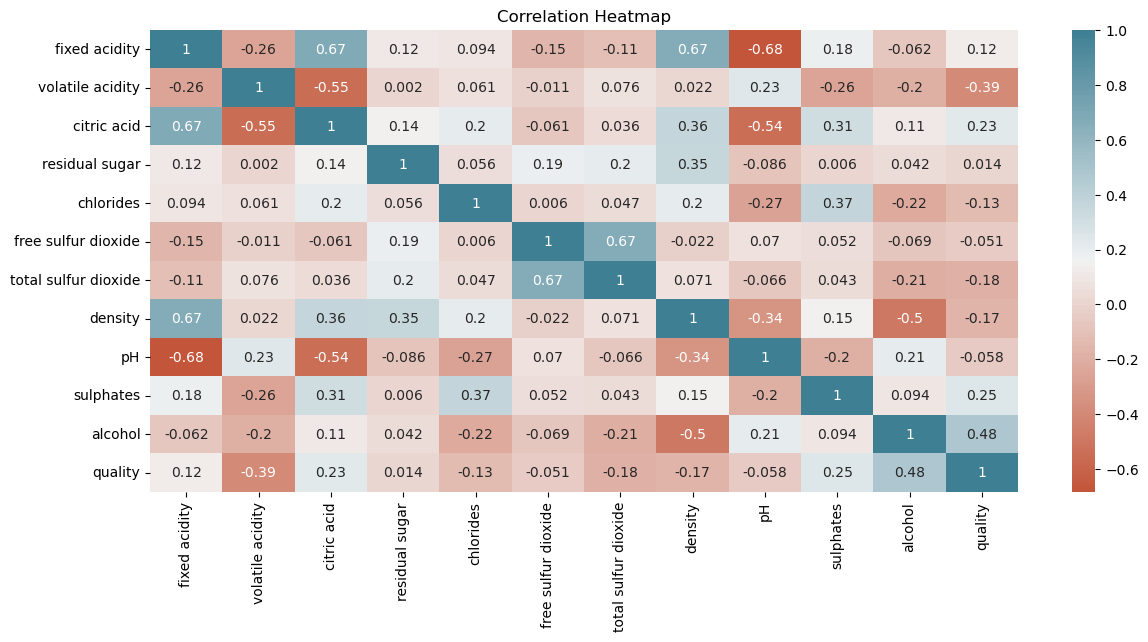

In [43]:
corr = wine.corr().round(3)
plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot = True,cmap = sns.diverging_palette(20, 220, n=200))
plt.title('Correlation Heatmap')

#### Which variable has the highest positive correlation with the target variable?

In [9]:
correlation_matrix = df.corr()
quality_corr = correlation_matrix ['quality'].drop('quality')
max_corr_variable = quality_corr.idxmax()
max_corr_value = quality_corr.max()

print(f"Variable with highest positive correlation to quality: {max_corr_variable} ({max_corr_value:.3f})")

Variable with highest positive correlation to quality: alcohol (0.476)


#### Which variable has the highest VIF?



In [145]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['quality'])

# Constant for intercept in VIF calculation
# X = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

print("VIF Scores:")
print(vif_data_sorted)



VIF Scores:
                Variable          VIF
7                density  1479.287209
8                     pH  1070.967685
10               alcohol   124.394866
0          fixed acidity    74.452265
9              sulphates    21.590621
1       volatile acidity    17.060026
2            citric acid     9.183495
4              chlorides     6.554877
6   total sulfur dioxide     6.519699
5    free sulfur dioxide     6.442682
3         residual sugar     4.662992


In [147]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate features and target
X = df.drop(columns=['quality'])  # Features
y = df['quality']                # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Preview
print("First 5 rows of scaled training data:")
print(X_train_scaled_df.head())

First 5 rows of scaled training data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.901034          0.054803     0.909414       -0.174359  -0.335359   
1       1.419987         -1.479676     0.909414        0.514355  -0.565570   
2       0.901034         -0.986451     1.420842       -0.312102  -0.523713   
3      -1.578410          1.753690    -1.136297       -0.794202  -0.879493   
4      -1.001795          1.068655    -0.931726        2.029526   0.627340   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.003122             -0.211913  1.244895  0.520910  -0.223584   
1             0.377220              0.056175  0.235179 -1.168416  -0.681310   
2            -1.049065             -0.986389  0.182036 -0.323753   0.749083   
3            -0.383465              1.217889 -2.315682  1.625469   0.920730   
4            -0.668722             -0.897027 -0.110250  0.261014  -0.967388   

    alcohol  
0 -0

### Use 80% of the data as the training set and the rest 20% of the data as test set.

In [149]:
# 80% training, 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check shape
print(f"X_train shape: {X_train.shape}") 

X_train shape: (1279, 11)



## Train a Linear Regression Model
#### Which variable has the highest positive coefficient in predicting wine quality?

In [151]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Confirm matching shapes
print(f"X columns: {len(X.columns)}, Coefficients: {len(model.coef_)}")

# Coefficients DataFrame
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Output the highest coefficient
print(coefficients)

# Identify the one with the highest coefficient
top = important_vars.iloc[0]
print(f"\nVariable with the highest coefficient: {top['Variable']} ({top['Coefficient']:.4f})")

X columns: 11, Coefficients: 11
                Variable  Coefficient
9              sulphates     0.924040
10               alcohol     0.267797
0          fixed acidity     0.041284
3         residual sugar     0.027870
5    free sulfur dioxide     0.002684
6   total sulfur dioxide    -0.002777
2            citric acid    -0.177927
8                     pH    -0.254486
1       volatile acidity    -1.149528
4              chlorides    -1.873407
7                density   -31.516666

Variable with the highest coefficient: sulphates (0.8412)


In [153]:
import statsmodels.api as sm

#  Add constant term to predictors
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()

print(model.summary())
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          1.79e-145
Time:                        19:02:26   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

### Evaluate the linear regression model on test and train set

In [155]:
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute RMSE for both sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Root Mean Squared Error (Train): {rmse_train:.4f}")
print(f"Root Mean Squared Error (Test):  {rmse_test:.4f}")

Root Mean Squared Error (Train): 0.6525
Root Mean Squared Error (Test):  0.6201


#### What is the R squared on test set?

In [157]:
from sklearn.metrics import r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_test_pred = model.predict(X_test)

# Compute R-squared on test set
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared on test set: {r2:.4f}")

R-squared on test set: 0.3284


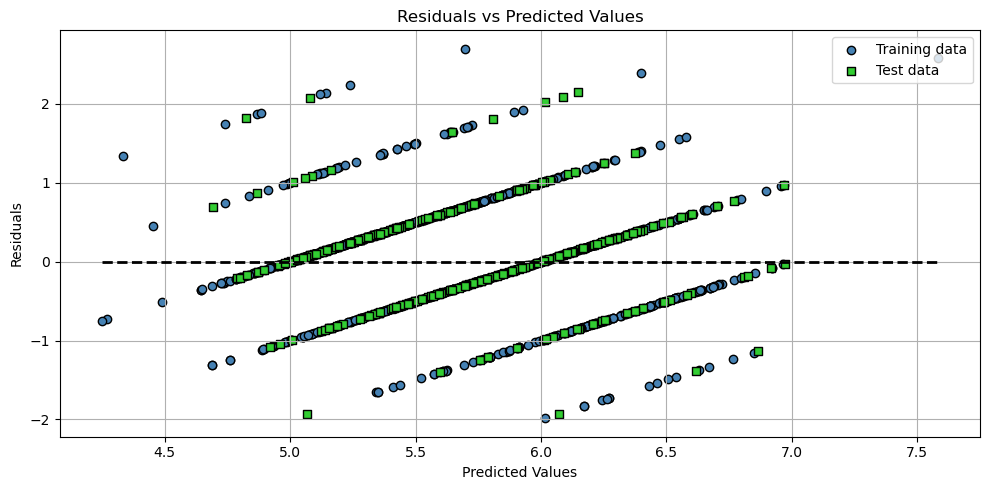

In [159]:
# Scatter plot: Actual vs Predicted

plt.figure(figsize=(10, 5))

# Residuals for training data (blue circles)
plt.scatter(y_train_pred, y_train_pred - y_train, 
            c='steelblue', marker='o', label="Training data", edgecolor='k')

# Residuals for test data (green squares)
plt.scatter(y_test_pred, y_test_pred - y_test, 
            color='limegreen', marker='s', label='Test data', edgecolor='k')

# Labels and horizontal reference line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), 
           xmax=max(y_train_pred.max(), y_test_pred.max()), 
           color='black', lw=2, linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()